In [2]:
import cv2
from deepface import DeepFace
import pandas as pd
import os


In [10]:

def extract_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Get the frames per second (fps) of the video
    fps = video.get(cv2.CAP_PROP_FPS)

    # Create a counter variable to track the frame number
    frame_counter = 0

    while True:
        # Read the next frame
        ret, frame = video.read()

        # If the frame was not successfully read, then we have reached the end of the video
        if not ret:
            break

        # Save the frame as an image file
        frame_path = f"{output_folder}/frame_{frame_counter}.jpg"
        cv2.imwrite(frame_path, frame)

        # Increment the frame counter
        frame_counter += 1
        if(frame_counter >= 2000):
            break

        # Display the frame number and the extracted frame
        print(f"Extracted frame {frame_counter}: {frame_path}")

    # Release the video file
    video.release()

    print("Extraction complete!")

# Specify the path to the video file and the output folder
video_path = "sample_video.mp4"
output_folder = "frames/"


Extracted frame 1: frames//frame_0.jpg
Extracted frame 2: frames//frame_1.jpg
Extracted frame 3: frames//frame_2.jpg
Extracted frame 4: frames//frame_3.jpg
Extracted frame 5: frames//frame_4.jpg
Extracted frame 6: frames//frame_5.jpg
Extracted frame 7: frames//frame_6.jpg
Extracted frame 8: frames//frame_7.jpg
Extracted frame 9: frames//frame_8.jpg
Extracted frame 10: frames//frame_9.jpg
Extracted frame 11: frames//frame_10.jpg
Extracted frame 12: frames//frame_11.jpg
Extracted frame 13: frames//frame_12.jpg
Extracted frame 14: frames//frame_13.jpg
Extracted frame 15: frames//frame_14.jpg
Extracted frame 16: frames//frame_15.jpg
Extracted frame 17: frames//frame_16.jpg
Extracted frame 18: frames//frame_17.jpg
Extracted frame 19: frames//frame_18.jpg
Extracted frame 20: frames//frame_19.jpg
Extracted frame 21: frames//frame_20.jpg
Extracted frame 22: frames//frame_21.jpg
Extracted frame 23: frames//frame_22.jpg
Extracted frame 24: frames//frame_23.jpg
Extracted frame 25: frames//frame_2

In [11]:
image_list = os.listdir("frames")


In [12]:
list_1 = []
list_2 = []
count = 0
for i in image_list:
    try:
        emotion = DeepFace.analyze("frames/{}".format(i), actions = ['emotion'])
        dict_1 = {'angry': 0, 'disgust' : 0,'fear' : 0, 'happy' : 0, 'sad' : 0,'surprise' : 0,'neutral': 0}
        for i in emotion:
            dict_1[i['dominant_emotion']] += 1
        # printing value

        list_1.append(dict_1)
        list_2.append(i)
        count += 1



    except:
        pass


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


In [14]:
data = pd.DataFrame(list_1)

In [15]:
data.to_csv("sample.csv")

In [ ]:

#data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data['neutral'] = data['neutral'].rolling(10).mean()
data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']] = data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']].rolling(5).mean()
data.dropna(inplace = True)

<Axes: >

: 

: 

In [19]:
data.columns

Index(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'], dtype='object')

<h1> plotting the data </h1>

In [41]:
testing_data = pd.read_csv("sample.csv")

In [42]:
testing_data.head(10)

,Unnamed: 0,angry,disgust,fear,happy,sad,surprise,neutral
0,0,0,0,1,0,1,0,1
1,1,1,0,1,0,0,0,1
2,2,0,0,1,0,1,0,1
3,3,0,0,1,0,2,0,0
4,4,0,0,1,0,1,0,0
5,5,0,0,1,0,1,0,0
6,6,0,0,1,0,0,0,1
7,7,0,0,1,0,1,0,0
8,8,0,0,1,0,1,0,0
9,9,0,0,1,0,1,0,0


In [43]:
testing_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [44]:
testing_data['neutral'] = testing_data['neutral'].rolling(50).mean()
testing_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']] = testing_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']].rolling(25).mean()
testing_data.dropna(inplace = True)

KeyboardInterrupt: 

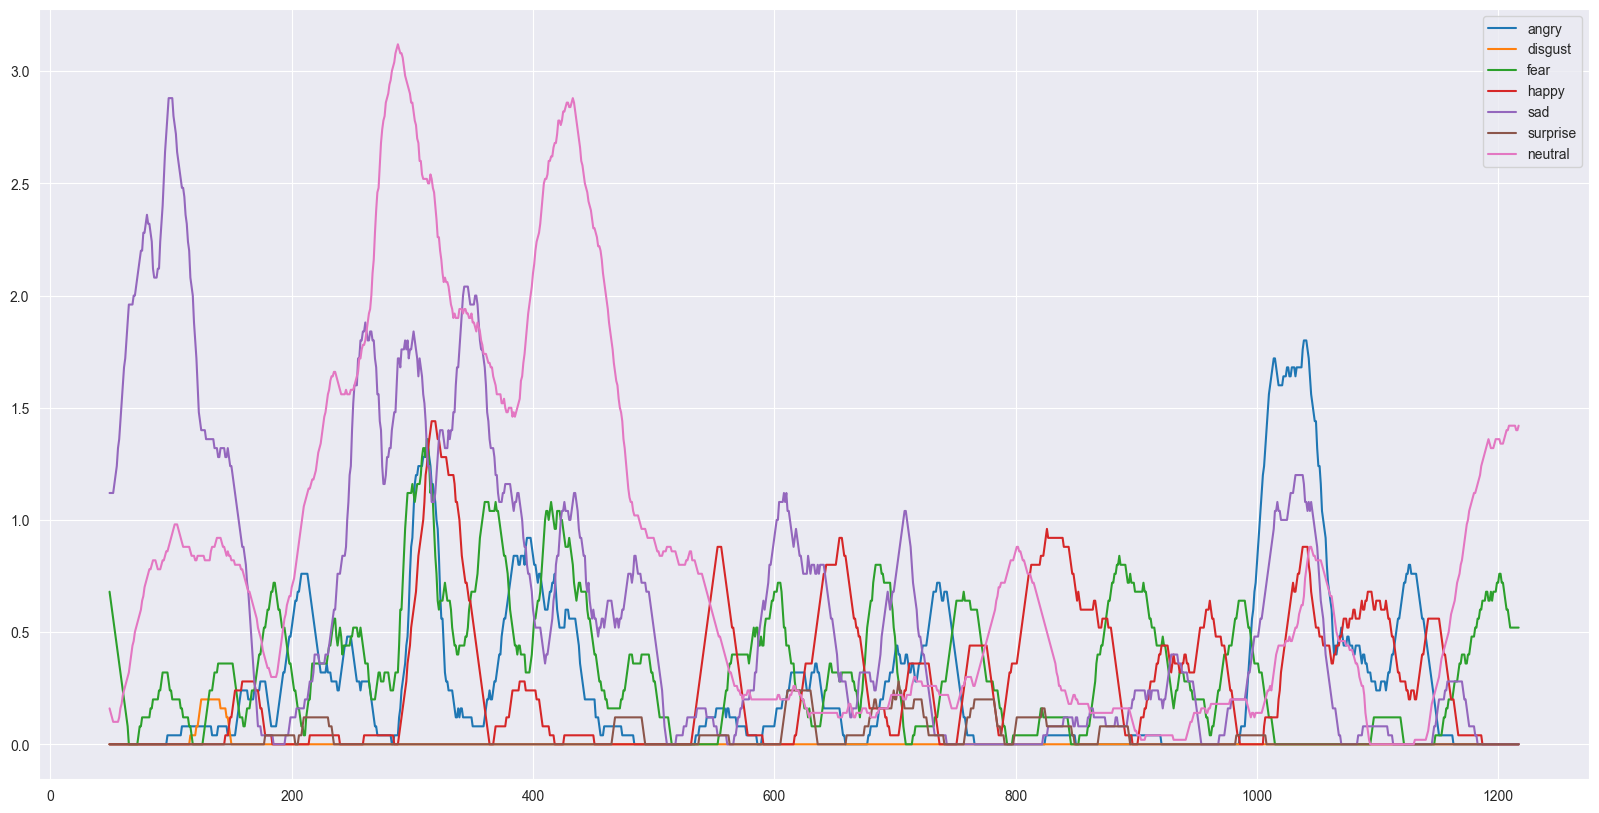

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10))

# Create a list to store the frames
frames = []

# Iterate over the data and plot each frame
for i in range(len(testing_data)):
    plt.plot(testing_data['angry'][:i], label='angry')
    plt.plot(testing_data['disgust'][:i], label='disgust')
    plt.plot(testing_data['fear'][:i], label='fear')
    plt.plot(testing_data['happy'][:i], label='happy')
    plt.plot(testing_data['sad'][:i], label='sad')
    plt.plot(testing_data['surprise'][:i], label='surprise')
    plt.plot(testing_data['neutral'][:i], label='neutral')
    plt.legend()
    
    # Save the plot as an image
    plt.savefig(f'frame_{i}.png')
    
    # Clear the plot for the next frame
    plt.clf()

    # Open the saved image and append it to the frames list
    frame = Image.open(f'frame_{i}.png')
    frames.append(frame)

# Create a video from the saved image frames using external tools or libraries
# (e.g., FFmpeg, OpenCV) based on your preferences

# Example using FFmpeg:
# ffmpeg -framerate 25 -i frame_%d.png -c:v libx264 -r 25 output.mp4

# Example using OpenCV (requires the OpenCV library):
# import cv2
# convert_frames_to_video(frames, frame_rate=25, output_video_path='output.mp4', frame_size=(640, 480))


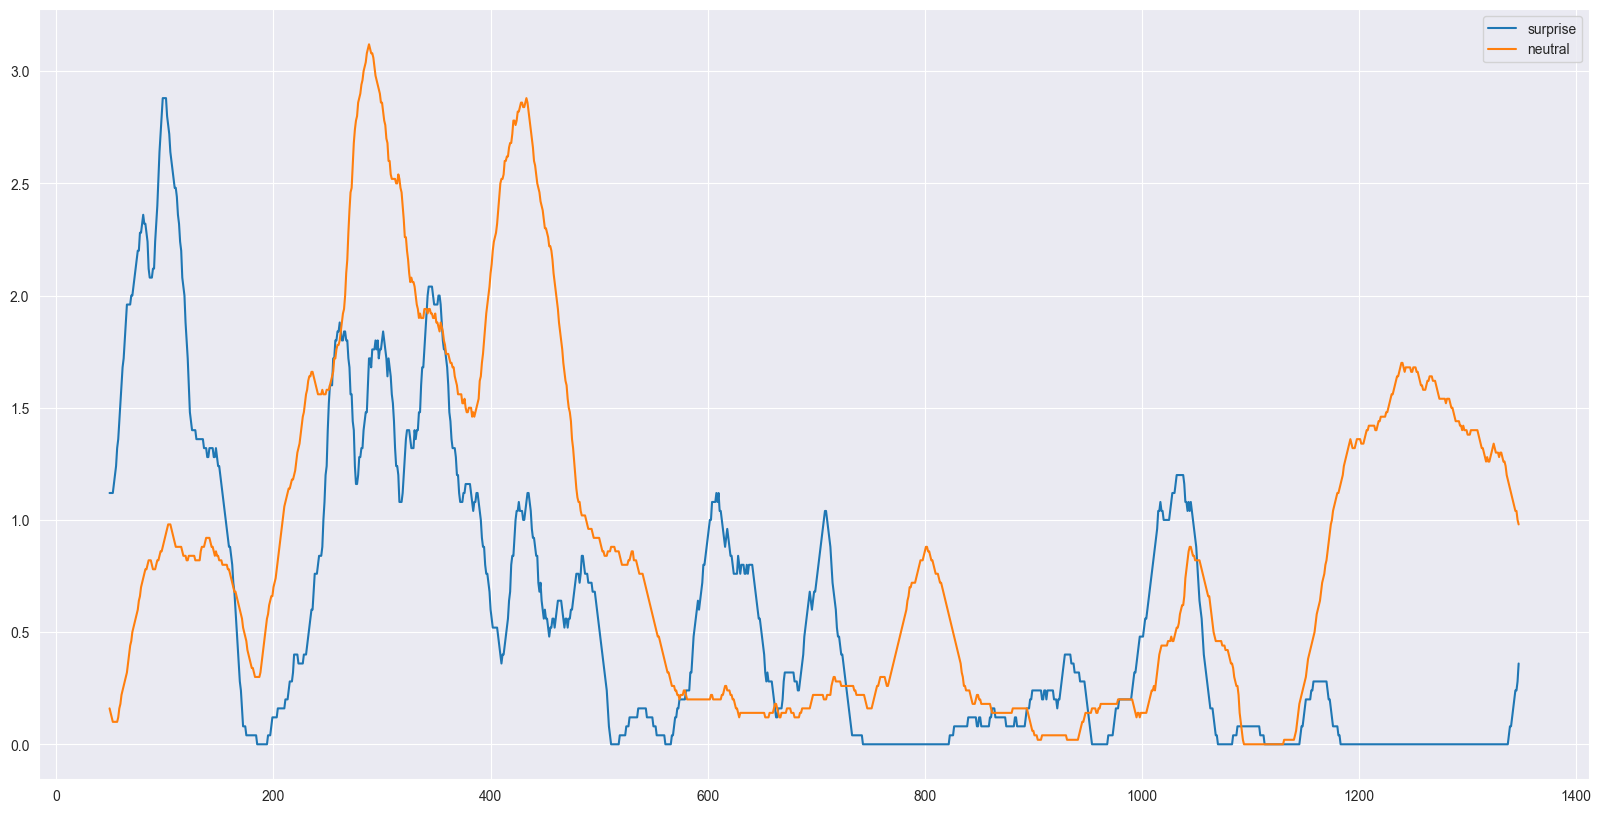

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (20, 10))

plt.plot(testing_data['sad'], label = 'surprise')
plt.plot(testing_data['neutral'], label = 'neutral')
plt.legend()
plt.show()

In [59]:
import cv2
import os

import cv2
import os

def convert_frames_to_video(frame_folder_path, frame_rate=30, output_video_path='output.mp4', frame_size=(640, 480)):
    # Get the list of frame files in the folder
    frame_files = sorted(os.listdir(frame_folder_path))

    # Read the first frame to get its shape
    first_frame_path = os.path.join(frame_folder_path, frame_files[0])
    first_frame = cv2.imread(first_frame_path)
    height, width, _ = first_frame.shape

    # Define the fourcc code based on the operating system
    if os.name == 'nt':  # Windows
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
    else:  # Linux or macOS
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    # Create a VideoWriter object
    video_writer = cv2.VideoWriter(output_video_path, fourcc, frame_rate, frame_size)

    # Write each frame to the video file
    for frame_file in frame_files:
        frame_path = os.path.join(frame_folder_path, frame_file)
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    # Release the video writer
    video_writer.release()

    print("Video conversion complete!")

# Example usage:
# frame_folder_path - the path to the folder containing the frames
# frame_rate - the frame rate (fps) of the output video (default: 30)
# output_video_path - the path where the output video will be saved (default: 'output.mp4')
# frame_size - the size (width, height) of the frames (default: (640, 480))
# Call the function to convert the frames into a video
convert_frames_to_video('frames', frame_rate=25, output_video_path='output.mp4', frame_size=(1280, 720))



Video conversion complete!
